In [1]:
# forecasting future sales using linear regression 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from sklearn.linear_model import LinearRegression


In [3]:
months =  np.array([1,2,3,4,5,6]).reshape(-1,1)
sales = np.array([10,12,13,15,17,18])

In [6]:
# train model
model = LinearRegression()
model.fit(months, sales)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
## presdict next month
july = np.array([[7]])
predicted_sales = model.predict(july)

In [13]:
print(f"predicted sales for july {predicted_sales[0]:2f} thousand")    ## .2f =for float with 2 decimal number 

predicted sales for july 19.866667 thousand


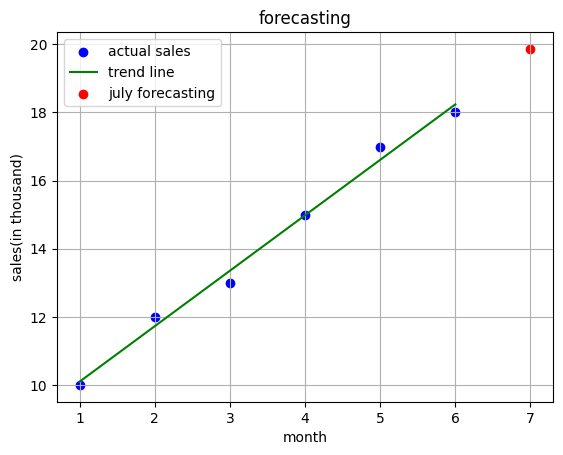

In [15]:
plt.scatter(months, sales, color ='blue', label='actual sales')
plt.plot(months,model.predict(months),label='trend line',color='green')
plt.scatter(july, predicted_sales, color ='red', label='july forecasting')
plt.xlabel("month")
plt.ylabel("sales(in thousand)")
plt.title("forecasting")
plt.legend()
plt.grid(True)
plt.show()

## 2. STOCK Price Prediction

In [56]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [58]:
df = pd.read_csv('GME_stock.csv')

In [59]:
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


<bound method NDFrame.describe of             date  open_price  ...      volume  adjclose_price
0     2021-01-28  265.000000  ...  347.510010      193.600006
1     2021-01-27  354.829987  ...  147.979996      347.510010
2     2021-01-26   88.559998  ...   76.790001      147.979996
3     2021-01-25   96.730003  ...   65.010002       76.790001
4     2021-01-22   42.590000  ...   43.029999       65.010002
...          ...         ...  ...         ...             ...
4768  2002-02-20    9.600000  ...    9.550000        6.648838
4769  2002-02-19    9.900000  ...    9.950000        6.430017
4770  2002-02-15   10.000000  ...   10.000000        6.699336
4771  2002-02-14   10.175000  ...   10.050000        6.733003
4772  2002-02-13    9.625000  ...         NaN        6.766666

[4773 rows x 7 columns]>

In [69]:
df['adjclose_price'] = df['close_price'].shift(-1)
features = ['close_price']
x = df[features]
y = df['adjclose_price']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y, shuffle=False, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y,test_size = 0.32, random_state = 42
)

In [74]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
mse = mean_squared_error(y_test, y_pred)
print("mean squared",mse)

ValueError: Found input variables with inconsistent numbers of samples: [1528, 955]

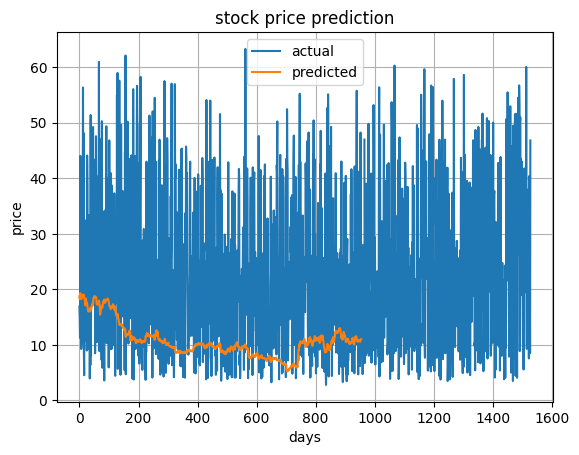

In [73]:
plt.plot(y_test.values, label='actual')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.title("stock price prediction")
plt.xlabel("days")
plt.ylabel("price")
plt.grid(True)
plt.show()